In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
govt = pd.read_excel(r'/content/govt_exam_data1.xlsx')
pvt = pd.read_excel(r'/content/pvt_job_data (1).xlsx')

govt.head()

,year,exam_name,exam_category,applicants,vacancies,selection_rate,avg_years_of_preperation,Avg_salary_lpa,selection_rate_pct,applicants_per_seat
0,2025,RRB Group D,Railway,10822423,32438,0.299730,5.5,5.0,2.495231,0.002997
1,2025,SSC CGL,SSC,3673000,18174,0.494800,7.0,7.0,0.129814,0.004948
2,2025,SSC Phase-13,SSC,2940175,2423,0.082410,6.0,6.0,0.484600,0.000824
3,2025,IBPS PO,Banking,600000,3049,0.508167,6.5,10.0,0.338778,0.005082
4,2025,NDA,UPSC,1000000,406,0.040600,2.0,14.0,0.002900,0.000406


In [3]:
govt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      50 non-null     int64  
 1   exam_name                 50 non-null     object 
 2   exam_category             50 non-null     object 
 3   applicants                50 non-null     int64  
 4   vacancies                 50 non-null     int64  
 5   selection_rate            50 non-null     float64
 6   avg_years_of_preperation  50 non-null     float64
 7   Avg_salary_lpa            50 non-null     float64
 8   selection_rate_pct        50 non-null     float64
 9   applicants_per_seat       50 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 4.0+ KB


In [5]:
print('The shape of govt data is :' ,  govt.shape)
print('The shape of the Pvt data is:',pvt.shape)

The shape of govt data is : (50, 10)
The shape of the Pvt data is: (7, 7)


In [6]:
for i in govt.columns:
  print(i)

year
exam_name
exam_category
applicants
vacancies
selection_rate
avg_years_of_preperation
Avg_salary_lpa
selection_rate_pct
applicants_per_seat


In [7]:
for i in pvt.columns:
  print(i)

Year
Role
Industry
Avg_Jobs_Posted
Min_Experience_Required
Avg_Salary_LPA
Entry_Level_Accessibility


In [8]:
govt.describe()

,year,applicants,vacancies,selection_rate,avg_years_of_preperation,Avg_salary_lpa,selection_rate_pct,applicants_per_seat
count,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2023.000000,3.709793e+06,4436.200000,41.127663,6.648485,7.964000,63.080536,0.411277
std,1.428571,4.875179e+06,7086.298927,276.067873,1.112931,3.250668,305.410560,2.760679
min,2021.000000,2.540000e+02,191.000000,0.007353,2.000000,3.000000,0.002900,0.000074
25%,2022.000000,6.000000e+05,362.500000,0.055752,6.298485,6.000000,0.038123,0.000558
50%,2023.000000,1.150000e+06,984.500000,0.090537,6.775758,7.850000,0.086446,0.000905
75%,2024.000000,3.400000e+06,6450.000000,0.167325,7.210606,10.750000,0.320750,0.001673
max,2025.000000,1.400000e+07,32438.000000,1951.754386,10.000000,15.000000,1951.754386,19.517544


In [28]:
govt["applicants_per_seat"] = govt["applicants"] / govt["vacancies"]
print("How many Comete for one seat:"  ,govt["applicants_per_seat"])

How many Comete for one seat: 0       333.634102
1       202.101904
2      1213.444078
3       196.785831
4      2463.054187
5       586.510264
6      1327.885598
7      1465.944971
8      1111.111111
9       583.333333
10     1473.716158
11      207.778255
12     1090.309446
13     1146.384480
14      890.471950
15      884.955752
16     1449.275362
17     1056.996504
18     1360.000000
19     1333.333333
20      446.666667
21      416.666667
22     1029.411765
23      633.713561
24     1011.122346
25     1333.333333
26     3768.115942
27     3111.111111
28     2057.613169
29      200.000000
30     2121.212121
31      435.897436
32      724.637681
33     2011.494253
34     1428.571429
35     1567.944251
36     2645.502646
37     2014.925373
38        1.016000
39        0.051236
40      916.666667
41      985.507246
42      802.377415
43     1884.057971
44      488.222698
45     2558.139535
46     7591.623037
47     1098.018211
48    13600.000000
49    13144.590495
Name: applicants_per

In [29]:
govt["selection_rate_pct"] = govt["selection_rate_pct"].round(3)
govt["applicants_per_seat"] = govt["applicants_per_seat"].round(0)


In [30]:
#some have selection rate below 0.1% , indicating extremely high risk
govt.sort_values("selection_rate_pct")


,year,exam_name,exam_category,applicants,vacancies,selection_rate,avg_years_of_preperation,Avg_salary_lpa,selection_rate_pct,applicants_per_seat
4,2025,NDA,UPSC,1000000,406,0.040600,2.000000,14.0,0.003,2463.0
23,2023,IBPS PO,Banking,500000,789,0.157800,6.584848,9.0,0.006,634.0
48,2021,AFACT,Indian Airforce,3400000,250,0.007353,7.645455,7.0,0.007,13600.0
49,2021,State Police,State Police,13000000,989,0.007608,7.687879,3.0,0.008,13145.0
22,2023,SSC Phase-15,SSC,350000,340,0.097143,6.542424,6.0,0.010,1029.0
14,2024,NDA,UPSC,1000000,1123,0.112300,6.203030,11.0,0.010,890.0
46,2021,CSE,UPSC,1450000,191,0.013172,7.560606,8.0,0.013,7592.0
8,2025,AFACT,Indian Airforce,300000,270,0.090000,4.000000,12.0,0.019,1111.0
15,2024,CDS,UPSC,600000,678,0.113000,6.245455,12.0,0.020,885.0
26,2023,CSE,UPSC,1300000,345,0.026538,6.712121,12.0,0.027,3768.0


In [10]:
pvt.describe()

,Year,Avg_Jobs_Posted,Min_Experience_Required,Avg_Salary_LPA
count,7.000000,7.000000,7.000000,7.000000
mean,2023.714286,24428.571429,0.857143,6.442857
std,1.112697,21313.979316,0.899735,0.888552
min,2022.000000,3000.000000,0.000000,5.500000
25%,2023.000000,10500.000000,0.000000,5.750000
50%,2024.000000,12000.000000,1.000000,6.500000
75%,2024.500000,37500.000000,1.500000,6.800000
max,2025.000000,60000.000000,2.000000,8.000000


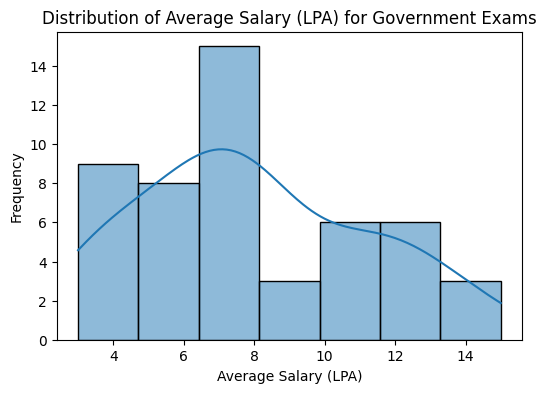

In [17]:
plt.figure(figsize=( 6,4))
sns.histplot(govt['Avg_salary_lpa'], kde=True)
plt.title('Distribution of Average Salary (LPA) for Government Exams')
plt.xlabel('Average Salary (LPA)')
plt.ylabel('Frequency')
plt.show()

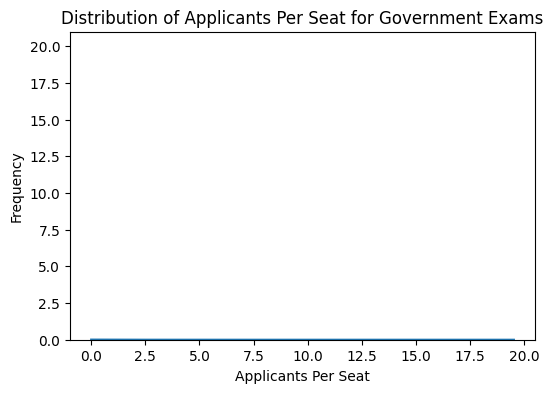

In [18]:
plt.figure(figsize=( 6,4))
sns.histplot(govt['applicants_per_seat'], kde=True)
plt.title('Distribution of Applicants Per Seat for Government Exams')
plt.xlabel('Applicants Per Seat')
plt.ylabel('Frequency')
plt.show()

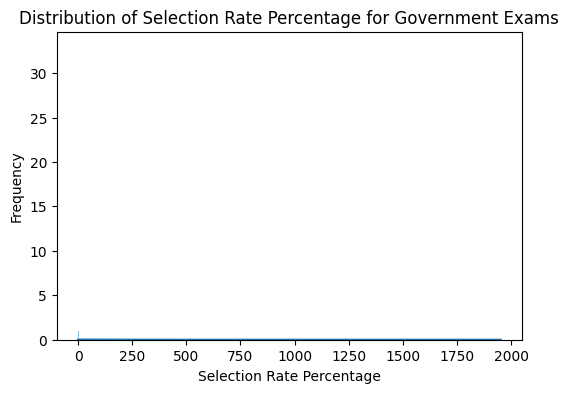

In [19]:
plt.figure(figsize=( 6,4))
sns.histplot(govt['selection_rate_pct'], kde=True)
plt.title('Distribution of Selection Rate Percentage for Government Exams')
plt.xlabel('Selection Rate Percentage')
plt.ylabel('Frequency')
plt.show()

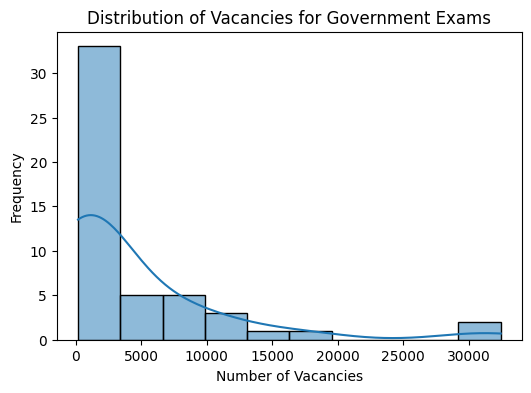

In [20]:
plt.figure(figsize=( 6,4))
sns.histplot(govt['vacancies'], kde=True)
plt.title('Distribution of Vacancies for Government Exams')
plt.xlabel('Number of Vacancies')
plt.ylabel('Frequency')
plt.show()

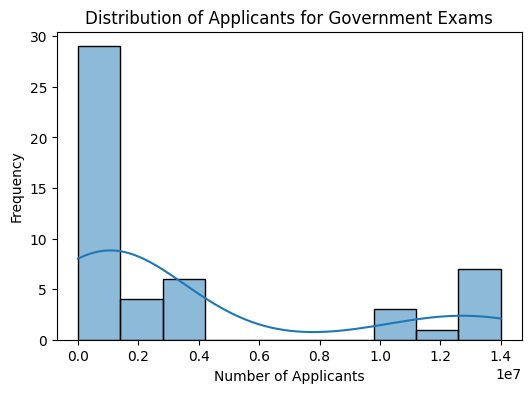

In [22]:
plt.figure(figsize=( 6,4))
sns.histplot(govt['applicants'], kde=True)
plt.title('Distribution of Applicants for Government Exams')
plt.xlabel('Number of Applicants')
plt.ylabel('Frequency')
plt.show()

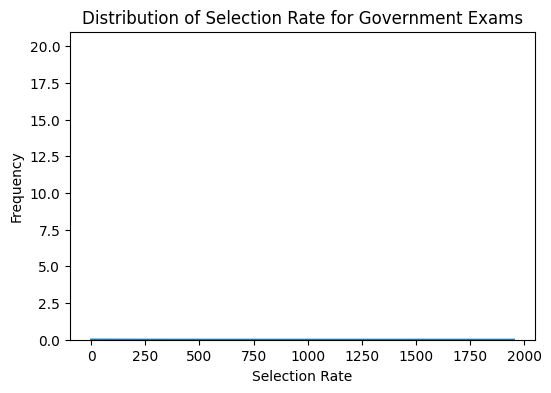

In [21]:
plt.figure(figsize=( 6,4))
sns.histplot(govt['selection_rate'], kde=True)
plt.title('Distribution of Selection Rate for Government Exams')
plt.xlabel('Selection Rate')
plt.ylabel('Frequency')
plt.show()

**PVT Data**

In [33]:
for i in pvt.columns:
  print(i)

Year
Role
Industry
Avg_Jobs_Posted
Min_Experience_Required
Avg_Salary_LPA
Entry_Level_Accessibility


In [36]:
pvt["entry_level_accessibility"] = pvt["Entry_Level_Accessibility"].str.capitalize()


In [37]:
pvt["Min_Experience_Required"] = pvt["Min_Experience_Required"].astype(str)

In [40]:
#Means faster returns on investing for private roles
pvt["salary_per_year_experience"] = (
    pvt["Avg_Salary_LPA"] / (pvt["Min_Experience_Required"].astype(float) + 1)
).round(2)

In [46]:
avg_private_salary = pvt["Avg_Salary_LPA"].mean()
print(avg_private_salary)


6.442857142857143
